In [59]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# from feature_extractor import *
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from scipy.stats import t
import plotly.express as px
import seaborn as sns

# from cuml.svm import SVC

In [60]:
train_df = pd.read_csv("../emnist/emnist-balanced-train.csv", header=None)
test_df = pd.read_csv("../emnist/emnist-balanced-test.csv", header=None)

# Add test dataset into train dataset
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

del train_df
del test_df

In [61]:

#Reading the file
label_map = pd.read_csv("../emnist/emnist-balanced-mapping.txt",
                        delimiter = ' ',
                        index_col=0,
                        header=None)
label_map = label_map.iloc[:, 0]


In [62]:
#Initialising an empty dictionary
label_dictionary = {}

#Running a loop for ASCII equivalent to character conversion
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

print(label_dictionary)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [63]:
print(df.shape)
print(df.describe())

(131600, 785)
                 0         1         2         3         4              5    \
count  131600.000000  131600.0  131600.0  131600.0  131600.0  131600.000000   
mean       23.000000       0.0       0.0       0.0       0.0       0.002036   
std        13.564712       0.0       0.0       0.0       0.0       0.295477   
min         0.000000       0.0       0.0       0.0       0.0       0.000000   
25%        11.000000       0.0       0.0       0.0       0.0       0.000000   
50%        23.000000       0.0       0.0       0.0       0.0       0.000000   
75%        35.000000       0.0       0.0       0.0       0.0       0.000000   
max        46.000000       0.0       0.0       0.0       0.0      63.000000   

                 6              7              8              9    ...  \
count  131600.000000  131600.000000  131600.000000  131600.000000  ...   
mean        0.012728       0.019354       0.016284       0.017447  ...   
std         1.312534       1.586618       1.521459  

In [64]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131595,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131596,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131598,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_nums = df[df[0] <= 9]
df_lletres = df[df[0] >= 10]
df_lletres = df_lletres[df_lletres[0] <= 35]
len([label_dictionary[x] for x in df_lletres[0].unique()])

26

In [66]:
X_nums = df_nums.iloc[:,1:]
y_nums = df_nums.iloc[:,0]
train_x_nums, test_x_nums, train_y_nums, test_y_nums = train_test_split(X_nums, y_nums, test_size=0.2, random_state=42, shuffle=True)
X_lletres = df_lletres.iloc[:,1:]
y_lletres = df_lletres.iloc[:,0]
train_x_lletres, test_x_lletres, train_y_lletres, test_y_lletres = train_test_split(X_lletres, y_lletres, test_size=0.2, random_state=42, shuffle=True)

26

In [67]:
resh = lambda x: np.array(x).reshape(28, 28)
train_x_nums_2d = train_x_nums.apply(resh, axis=1)
test_x_nums_2d = test_x_nums.apply(resh, axis=1)
train_x_lletres_2d = train_x_lletres.apply(resh, axis=1)
test_x_lletres_2d = test_x_lletres.apply(resh, axis=1)

In [68]:
print(train_x_nums.shape)
print(train_x_lletres.shape)
print(pd.concat([train_x_lletres,train_x_nums]).shape)

(22400, 784)
(58240, 784)
(80640, 784)


In [69]:
train_nums = pd.concat([train_x_nums,train_y_nums],axis=1)
train_nums

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,0
18176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
35530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
66798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
28162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
74152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
output_nums = pd.DataFrame(columns=['#fold', 'accuracy_score','f1_score','precision_score','recall_score'])
train_nums = pd.concat([train_x_nums,train_y_nums],axis=1)
for i, (train_index, test_index) in enumerate(kfold.split(train_nums)):
    print("Fold #", i)
    X_train, X_test = train_nums.iloc[train_index,:-1], train_nums.iloc[test_index,:-1]
    y_train, y_test = train_nums.iloc[train_index,-1], train_nums.iloc[test_index,-1]
    model = SVC(kernel='linear', C=1, random_state=42)
    model.fit(X_train, y_train)
    print("fitted!!")
    y_pred = model.predict(X_test)
    print("predicted!!")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    output_nums = output_nums.append({'#fold': i,
                                            'accuracy_score': accuracy_score(y_test, y_pred),
                                            'f1_score': f1_score(y_test, y_pred, average='macro'),
                                            'precision_score': precision_score(y_test, y_pred, average='macro'),
                                            'recall_score': recall_score(y_test, y_pred, average='macro')}, ignore_index=True)

Fold # 0
fitted!!
predicted!!
Accuracy: 0.9296875
F1: 0.9295542673859059
Precision: 0.9297673809245891
Recall: 0.9296582559697596
Fold # 1


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\1359055015.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.9325892857142857
F1: 0.9323452009201653
Precision: 0.9321913128423507
Recall: 0.9328752527624872
Fold # 2


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\1359055015.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.9241071428571429
F1: 0.9239662210326666
Precision: 0.9241668617502649
Recall: 0.9243369783855598
Fold # 3


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\1359055015.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.9194196428571428
F1: 0.918862461721905
Precision: 0.9194059169630874
Recall: 0.9190362176712951
Fold # 4


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\1359055015.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.9265625
F1: 0.9261205833226
Precision: 0.9265175430468202
Recall: 0.9264329763474228


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\1359055015.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [71]:
output_nums

,#fold,accuracy_score,f1_score,precision_score,recall_score
0,0.0,0.929688,0.929554,0.929767,0.929658
1,1.0,0.932589,0.932345,0.932191,0.932875
2,2.0,0.924107,0.923966,0.924167,0.924337
3,3.0,0.919420,0.918862,0.919406,0.919036
4,4.0,0.926562,0.926121,0.926518,0.926433


In [72]:
output_nums.mean()

#fold              2.000000
accuracy_score     0.926473
f1_score           0.926170
precision_score    0.926410
recall_score       0.926468
dtype: float64

In [73]:
# SVClassifier_nums_1d = SVC(kernel='linear', verbose=True, random_state=42, C=1.0)
# # SVClassifier_nums_1d.fit(train_x_nums,train_y_nums)
# cv_nums = cross_val_score(SVClassifier_nums_1d, train_x_nums, train_y_nums, cv=5,scoring=['accuracy','f1_score','precision','recall'])


In [74]:
SVC_pred_nums_1d = model.predict(test_x_nums)
print(classification_report(test_y_nums, SVC_pred_nums_1d))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       536
           1       0.95      0.99      0.97       578
           2       0.89      0.95      0.92       534
           3       0.91      0.93      0.92       565
           4       0.91      0.92      0.92       546
           5       0.91      0.89      0.90       595
           6       0.98      0.94      0.96       574
           7       0.94      0.95      0.95       565
           8       0.96      0.87      0.92       556
           9       0.90      0.90      0.90       551

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



In [75]:
train_x_nums.shape

(22400, 784)

In [76]:
# resampling amb 10 classes
samples = list()
for i in range(df_lletres[0].max()):
    if i < 9: continue
    samples.append(df_lletres[df_lletres[0]==i].sample(frac=0.11, random_state=42))

sample_lletres = pd.concat(samples)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
output_lletres = pd.DataFrame(columns=['#fold', 'accuracy_score','f1_score','precision_score','recall_score'])
for i, (train_index, test_index) in enumerate(kfold.split(sample_lletres)):
    print("Fold #", i)
    X_train, X_test = sample_lletres.iloc[train_index,1:], sample_lletres.iloc[test_index,1:]
    y_train, y_test = sample_lletres.iloc[train_index,0], sample_lletres.iloc[test_index,0]
    model2 = SVC(kernel='linear', C=1, random_state=42)
    model2.fit(X_train, y_train)
    print("fitted!!")
    y_pred = model2.predict(X_test)
    print("predicted!!")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    output_lletres = output_lletres.append({'#fold': i,
                                            'accuracy_score': accuracy_score(y_test, y_pred),
                                            'f1_score': f1_score(y_test, y_pred, average='macro'),
                                            'precision_score': precision_score(y_test, y_pred, average='macro'),
                                            'recall_score': recall_score(y_test, y_pred, average='macro')}, ignore_index=True)
# train_y_lletres = sample_lletres.iloc[:,0]
# train_x_lletres = sample_lletres.iloc[:,1:]
# print(train_x_nums.shape)
# print(train_x_lletres.shape)
# # print(train_y_lletres.iloc[0])
# print(train_y_lletres.value_counts())

Fold # 0
fitted!!
predicted!!
Accuracy: 0.7681818181818182
F1: 0.7674725521445346
Precision: 0.7718326959404337
Recall: 0.7665029397530668
Fold # 1


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\2501234484.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.7415584415584415
F1: 0.7436745753464038
Precision: 0.7527798403025812
Recall: 0.7424583449766637
Fold # 2


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\2501234484.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.7727272727272727
F1: 0.76992854979726
Precision: 0.7724590735800024
Recall: 0.7720028575150457
Fold # 3


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\2501234484.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.7467532467532467
F1: 0.745973363733471
Precision: 0.7492464507974439
Recall: 0.7473874170157484
Fold # 4


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\2501234484.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



fitted!!
predicted!!
Accuracy: 0.7688311688311689
F1: 0.7693614450050563
Precision: 0.7739719075602877
Recall: 0.770972065643507


C:\Users\berna\AppData\Local\Temp\ipykernel_20764\2501234484.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [77]:
sample_lletres.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

In [78]:
output_lletres.mean()

#fold              2.000000
accuracy_score     0.759610
f1_score           0.759282
precision_score    0.764058
recall_score       0.759865
dtype: float64

In [118]:
len(np.unique(SVC_pred_lletres_1d))

25

In [79]:
SVC_pred_lletres_1d = model2.predict(test_x_lletres)
print(classification_report(test_y_lletres, SVC_pred_lletres_1d))

              precision    recall  f1-score   support

          10       0.75      0.78      0.76       568
          11       0.70      0.88      0.78       527
          12       0.74      0.92      0.82       552
          13       0.77      0.84      0.80       583
          14       0.73      0.81      0.77       597
          15       0.75      0.75      0.75       570
          16       0.82      0.78      0.80       592
          17       0.74      0.82      0.78       585
          18       0.46      0.58      0.51       589
          19       0.74      0.81      0.78       597
          20       0.70      0.71      0.71       548
          21       0.51      0.57      0.54       581
          22       0.92      0.89      0.90       591
          23       0.74      0.75      0.75       537
          24       0.86      0.85      0.85       554
          25       0.81      0.84      0.82       532
          26       0.83      0.77      0.80       537
          27       0.76    

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\berna\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [92]:
output_nums

,#fold,accuracy_score,f1_score,precision_score,recall_score
0,0.0,0.929688,0.929554,0.929767,0.929658
1,1.0,0.932589,0.932345,0.932191,0.932875
2,2.0,0.924107,0.923966,0.924167,0.924337
3,3.0,0.919420,0.918862,0.919406,0.919036
4,4.0,0.926562,0.926121,0.926518,0.926433


In [94]:
output_nums_acc = output_nums['accuracy_score']
output_lletres_acc = output_lletres['accuracy_score']
print(t.interval(alpha=0.95, df=len(output_nums_acc)-1, loc=output_nums_acc.mean(), scale=output_nums_acc.std()/np.sqrt(len(output_nums_acc))))
print(t.interval(alpha=0.95, df=len(output_lletres_acc)-1, loc=output_lletres_acc.mean(), scale=output_lletres_acc.std()/np.sqrt(len(output_lletres_acc))))

(0.9201694884811467, 0.9327769400902821)
(0.7418137908914127, 0.7774069883293665)


In [95]:
fig = px.box(output_nums_acc, y="accuracy_score", title="Accuracy score for numbers")
fig2 = px.box(output_lletres_acc, y="accuracy_score", title="Accuracy score for letters")
fig.show()
fig2.show()

['6', '0', '2', '0', '7', '6', '4', '9', '7', '1', '2', '7', '9', '7', '4', '0', '7', '3', '6', '8', '9', '3', '9', '0', '2', '6', '0', '7', '0', '1', '7', '2', '8', '7', '9', '4', '2', '1', '9', '1', '2', '5', '3', '6', '2', '6', '6', '8', '7', '8', '5', '4', '3', '8', '9', '4', '3', '0', '3', '4', '5', '2', '7', '8', '2', '9', '0', '2', '9', '7', '0', '8', '0', '0', '4', '8', '2', '6', '0', '9', '2', '5', '8', '5', '4', '7', '9', '7', '3', '4', '3', '0', '9', '0', '3', '8', '3', '8', '4', '5', '5', '6', '9', '2', '3', '2', '6', '3', '3', '7', '0', '5', '2', '7', '9', '1', '8', '8', '7', '3', '2', '7', '1', '3', '0', '6', '7', '2', '3', '2', '5', '6', '9', '4', '8', '5', '8', '5', '6', '9', '8', '0', '5', '1', '7', '6', '9', '8', '4', '6', '6', '9', '9', '4', '4', '4', '2', '2', '7', '9', '1', '5', '7', '7', '0', '3', '4', '4', '9', '3', '0', '4', '4', '2', '7', '2', '1', '5', '9', '7', '0', '1', '4', '5', '5', '2', '0', '2', '1', '7', '4', '1', '6', '3', '6', '1', '4', '6', '5', '1',

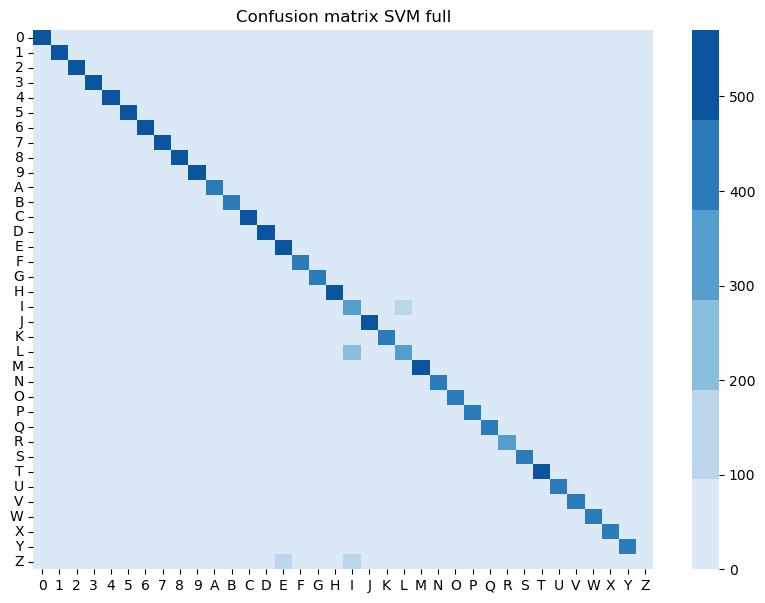

In [117]:
all_pred = [label_dictionary[x] for x in np.concatenate((SVC_pred_nums_1d, SVC_pred_lletres_1d))]
all_y_test = [label_dictionary[x] for x in np.concatenate((test_y_nums, test_y_lletres))]
print(all_pred)
# all_pred = np.apply_along_axis(lambda x: label_dictionary[x], 0, all_pred)
# all_y_test = np.apply_along_axis(lambda x: label_dictionary[x], 0, all_y_test)

confmat_nums = confusion_matrix(all_y_test, all_pred)
print(confmat_nums.shape)
print(len(label_dictionary))
confmat_nums = pd.DataFrame(confmat_nums, columns=list(label_dictionary.values())[:36], index=list(label_dictionary.values())[:36])
# confmat_lletres = confusion_matrix(test_y_lletres, SVC_pred_lletres_1d)

# print(confmat_lletres.shape)
plt.figure(figsize=(10,7))
sns.heatmap(confmat_nums, annot=False, fmt="d", cmap=sns.color_palette("Blues"), annot_kws=label_dictionary)
plt.title("Confusion matrix SVM full")
plt.xticks(rotation=0)
plt.yticks(rotation=0) 
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()
# sns.heatmap(confmat_lletres, annot=False, fmt="d", cmap="Blues")
# plt.show()
# print(confmat_lletres)

In [22]:
with open('../svm_img_model_numbers.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('../svm_img_model_letters.pkl', 'wb') as model_file:
    pickle.dump(model2, model_file)